# Problem 1.

## Potrebni importi

In [1]:
from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from nltk.lm.preprocessing import padded_everygram_pipeline
import ebooklib
import re
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from bs4 import BeautifulSoup
from ebooklib import epub
from nltk.lm import MLE
import os
import requests
import io
import random

# Konverzija izabranih tekstova:
### Ivana Brlic Mazuranic - Basne
### Ivan Gundulic - Osman
### Marko Marulic - Judita
### Vjenceslav Novak - Posljednji Stipancici

In [7]:
def epub2thtml(epub_path):
    book = epub.read_epub(epub_path)
    chapters = []
    for item in book.get_items():
        if item.get_type() == ebooklib.ITEM_DOCUMENT:
            chapters.append(item.get_content())
    return chapters

blacklist = [   '[document]',   'noscript', 'header',   'html', 'meta', 'head','input', 'script']
def chap2text(chap):
    output = ''
    soup = BeautifulSoup(chap, 'html.parser')
    text = soup.find_all(text=True)
    for t in text:
        if t.parent.name not in blacklist:
            output += '{} '.format(t)
    return output
def thtml2ttext(thtml):
    Output = []
    for html in thtml:
        text =  chap2text(html)
        Output.append(text)
    return Output
def epub2text(epub_path):
    chapters = epub2thtml(epub_path)
    ttext = thtml2ttext(chapters)
    return ttext

def listToString(s):
    str1 = ""
    for elem in s:
        str1 += elem
    return str1


out=epub2text('marulic_judita.epub')

outString = listToString(out)
plainText = re.sub(r'[~%&\<>?#]+(r|n|xa0)',"",outString)
file1 = open("marulic_judita.txt","w")
file1.write(str(plainText))
file1.close()

out=epub2text('brlicmazuranic_basne.epub')

outString = listToString(out)
plainText = re.sub(r'[~%&\<>?#]+(r|n|xa0)',"",outString)
file1 = open("brlicmazuranic_basne.txt","w")
file1.write(str(plainText))
file1.close()

out=epub2text('gundulic_osman.epub')

outString = listToString(out)
plainText = re.sub(r'[~%&\<>?#]+(r|n|xa0)',"",outString)
file1 = open("gundulic_osman.txt","w")
file1.write(str(plainText))
file1.close()

out=epub2text('novak_posljednji-stipancici3.epub')

outString = listToString(out)
plainText = re.sub(r'[~%&\<>?#]+(r|n|xa0)',"",outString)
file1 = open("novak_posljednji-stipancici3.txt","w")
file1.write(str(plainText))
file1.close()

### Kreiranje liste featuresets unutar koje spajamo autora s atributom rijeci, koje se nalaze u njegovim tekstovima

In [8]:
file_BM = open("brlicmazuranic_basne.txt")
file_G  = open("gundulic_osman.txt")
file_N  = open("novak_posljednji-stipancici3.txt")
file_M  = open("marulic_judita.txt")

featuresets = []

for line in file_BM:
    for word in line.split(' '):
        if word != '\n' and word != '' and '\xa0' not in word:
            featuresets.append(({'word': word}, 'brlicmazuranic'))
            
for line in file_G:
    for word in line.split(' '):
        if word != '\n' and word != '' and '\xa0' not in word:
            featuresets.append(({'word': word}, 'gundulic'))
            
for line in file_M:
    for word in line.split(' '):
        if word != '\n' and word != '' and '\xa0' not in word:
            featuresets.append(({'word': word}, 'marulic'))   

for line in file_N:
    for word in line.split(' '):
        if word != '\n' and word != '' and '\xa0' not in word:
            featuresets.append(({'word': word}, 'novak'))


### Razdvajanje featuresets-a na set za treniranje i testiranje te klasifikacija na setu za treniranje

In [9]:
random.shuffle(featuresets)

train_set, test_set = featuresets[1000:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

nltk.classify.accuracy(classifier,test_set)

0.612

### Omogućavamo unos rečenice koja pripada nekome autoru, te računamo koji autor je najvjerojatnije napisao tu rečenicu

In [10]:
inputString = input('Unesite rečenicu:\n')

potential = []
for i in inputString.split(' '):
    potential.append(classifier.classify({'word': i}))

print("Fraza najvjerojatnije pripada autoru: ", max(set(potential), key = potential.count).capitalize())

Unesite rečenicu:
 Ljepota je od naravi 1   1. i dalje: definicija ženske ljepote (kao uvod u proslavljanje austrijske princeze Cecilije Renate, zaručnice i uskoro zatim žene kraljevića Vladislava), za razliku od ljepote kakvu pjesnik prikazuje u  Suzama sina razmetnoga,  gdje je ona samo zamaskirana ružnoća, sračunata da zavede i povede čovjeka u propast, svodi se ovdje na ideal kakav su na temelju antičke filozofije i literature stvorili renesansni pjesnici.


Fraza najvjerojatnije pripada autoru:  Gundulic


# Problem 2.

### Kreiranje korpusa

In [17]:
#!script "convert.py"

## eLektire korpus

In [6]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'corpus'

eLektire = PlaintextCorpusReader(corpus_root, '.*')
eLektire.fileids()

['aristofan_zabe.txt',
 'arnold_izabranepjesme.txt',
 'badalic_zrinjski.txt',
 'balzac_cica-goriot3.txt',
 'balzac_sarrasine-nepoznato.txt',
 'baum_carobnjak-iz-oza3.txt',
 'begovic_amerikanskajahta.txt',
 'begovic_beztreceg.txt',
 'begovic_biskupovasinovica.txt',
 'begovic_bozjicovjek.txt',
 'begovic_gigabariceva.txt',
 'begovic_hrvatskidiogenes.txt',
 'begovic_izabranepripovijetke.txt',
 'begovic_poezija.txt',
 'begovic_pustolovpredvratima.txt',
 'begovic_venusvictrix.txt',
 'benetovic_hvarkinja.txt',
 'boccaccio_dekameron.txt',
 'bogovic_krvavimostuzagrebu.txt',
 'bogovic_matijagubec.txt',
 'botic_bijednamara.txt',
 'bresan_predstava-hamleta-u-selu-mrdusa-donja3.txt',
 'brezovacki_diogenes.txt',
 'brezovacki_matijasgrabancijasdijak.txt',
 'brlic-mazuranic_cudnovate-zgode-segrta-hlapica3.txt',
 'brlic-mazuranic_price-iz-davnine3.txt',
 'brlicmazuranic_bajke.txt',
 'brlicmazuranic_basne.txt',
 'brlicmazuranic_jasadalmatin.txt',
 'bunicvucic_plandovanja.txt',
 'burnett_malilord.txt',
 

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA

In [9]:
from string import punctuation
dataset=[]
for file in eLektire.fileids():
     dataset+=[[word.lower() for word in sent if word not in punctuation and word.isalpha()] for sent in eLektire.sents(file)]
     print('Dodavanje lektire: ' + file)
   

Dodavanje lektire: aristofan_zabe.txt
Dodavanje lektire: arnold_izabranepjesme.txt
Dodavanje lektire: badalic_zrinjski.txt
Dodavanje lektire: balzac_cica-goriot3.txt
Dodavanje lektire: balzac_sarrasine-nepoznato.txt
Dodavanje lektire: baum_carobnjak-iz-oza3.txt
Dodavanje lektire: begovic_amerikanskajahta.txt
Dodavanje lektire: begovic_beztreceg.txt
Dodavanje lektire: begovic_biskupovasinovica.txt
Dodavanje lektire: begovic_bozjicovjek.txt
Dodavanje lektire: begovic_gigabariceva.txt
Dodavanje lektire: begovic_hrvatskidiogenes.txt
Dodavanje lektire: begovic_izabranepripovijetke.txt
Dodavanje lektire: begovic_poezija.txt
Dodavanje lektire: begovic_pustolovpredvratima.txt
Dodavanje lektire: begovic_venusvictrix.txt
Dodavanje lektire: benetovic_hvarkinja.txt
Dodavanje lektire: boccaccio_dekameron.txt
Dodavanje lektire: bogovic_krvavimostuzagrebu.txt
Dodavanje lektire: bogovic_matijagubec.txt
Dodavanje lektire: botic_bijednamara.txt
Dodavanje lektire: bresan_predstava-hamleta-u-selu-mrdusa-d

In [10]:
from gensim.models import Word2Vec

model = Word2Vec(dataset, min_count=5, size=200)

model.save('eLektirevec_gensim')

word_vectors = model.wv

word_vectors.save_word2vec_format('eLektire_word2vec_org', 'eLektire_word2vec_vocabulary')

len(word_vectors.vocab)

94371

In [11]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

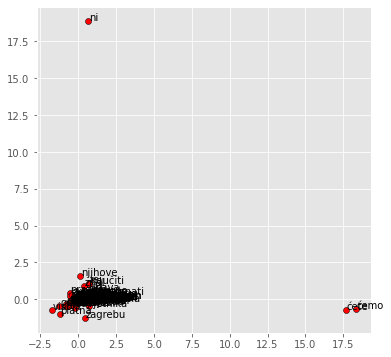

In [12]:
display_pca_scatterplot(word_vectors, sample=300)

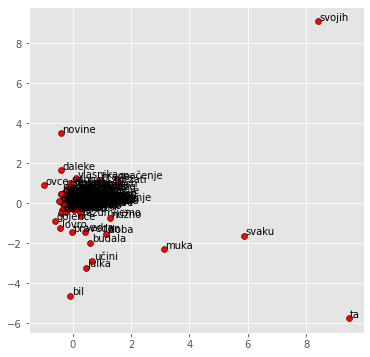

<Figure size 480x480 with 0 Axes>

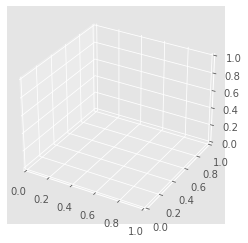

In [18]:
def display_pca_scatterplot3D(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
        
    
    my_dpi=96
    plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)



    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
    

display_pca_scatterplot3D(word_vectors, sample=300)